<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 1 </H3>
<hr style="height:2px;border:none"/>

## Integrantes

* Andrés Huerta - 201473544-8 - andres.huerta.14@sansano.usm.cl
* Felipe Vega - 201473511-1 - felipe.vega.14@sansano.usm.cl



<hr style="height:2px;border:none"/>

In [1]:
#Imports Here :D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import wilcoxon
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from keras.layers import Dropout
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

C:\Users\Felipe\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.


<hr style="height:2px;border:none"/>
# Calidad de un vino
<hr style="height:2px;border:none"/>

> **a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.**

In [2]:
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")

Se cuenta con dos dataset sobre las características fisioquímicas de distintos vinos *Vinho Verde*, donde uno corresponde a los vinos tintos y el otro a los vinos blancos. Son 11 características por vino, las cuales miden acidez (fija, volátil y crítica), residuos de azucar, chlorides, dioxido de azufre (libre y total), densidad, pH, sulfatos y alcohol. Cada uno de estos vinos cuenta con una calidad, las cuales son los valores enteros entre 0 y 10.

In [3]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


El dataset de vinos tintos cuenta con 1599 registros, donde no se presentan valores nulos.

In [4]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


En cambio, el dataset de vinos blancos cuenta con 4898 registros sin valores nulos.

In [5]:
print("Promedio de calidad vinos tintos",df_red.quality.mean())
print("Promedio de calidad vinos blancos",df_white.quality.mean())

Promedio de calidad vinos tintos 5.6360225140712945
Promedio de calidad vinos blancos 5.87790935075541


En promedio, ambos vinos tienen un promedio de calidad similar, siendo el promedio de los vinos blancos ligeramente superior.

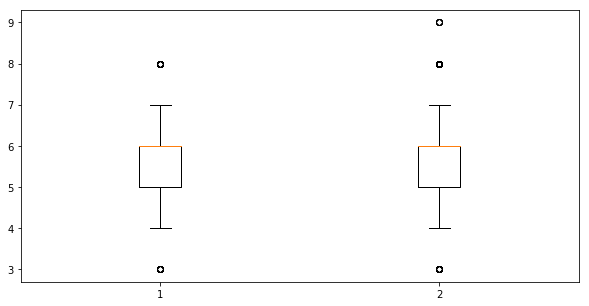

In [6]:
plt.figure(figsize=(10,5))
plt.boxplot([df_red.quality,df_white.quality])
plt.show()

Utilizando Boxplot se puede ver que ambos vinos se comportan de forma similar en cuanto a calidad.

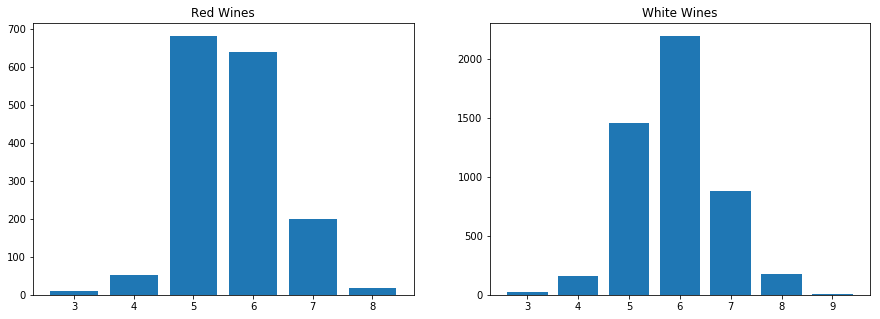

In [7]:
cantidad_red = df_red.quality.value_counts()
valores_red = [5,6,7,4,8,3]
cantidad_white = df_white.quality.value_counts()
valores_white = [6,5,7,8,4,3,9]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Red Wines")
plt.bar(valores_red,cantidad_red)
plt.subplot(122)
plt.title("White Wines")
plt.bar(valores_white,cantidad_white)
plt.show()

Además, se puede observar en ambos dataset que la cantidad de vinos por calidad está desbalanceada. Para los vinos tintos se cuentan con calidades entre 3 y 8, donde los dos valores más altos son la calidad 5 y 6. En el caso de los vinos blancos, se cuentan con calidades entre 3 y 9, donde los dos valores más altos son la calidad 6 y 5.

Se unen ambos dataset en uno único para trabajar. Para poder distingir de que dataset viene cada registro se crea una columna **type** indicando si es un vino blanco o uno tinto.

In [8]:
df_red["type"] = "red"
df_white["type"] = "white"
df = pd.concat([df_red,df_white],axis=0)
df = pd.get_dummies(df, columns=["type"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type_red                6497 non-null uint8
type_white              6497 non-null uint8
dtypes: float64(11), int64(1), uint8(2)
memory usage: 672.5 KB


Se genera un histograma por cada atributo, para así poder obtener ideas para aplicar ciertas discretizaciones de atributos en caso de ser necesario.

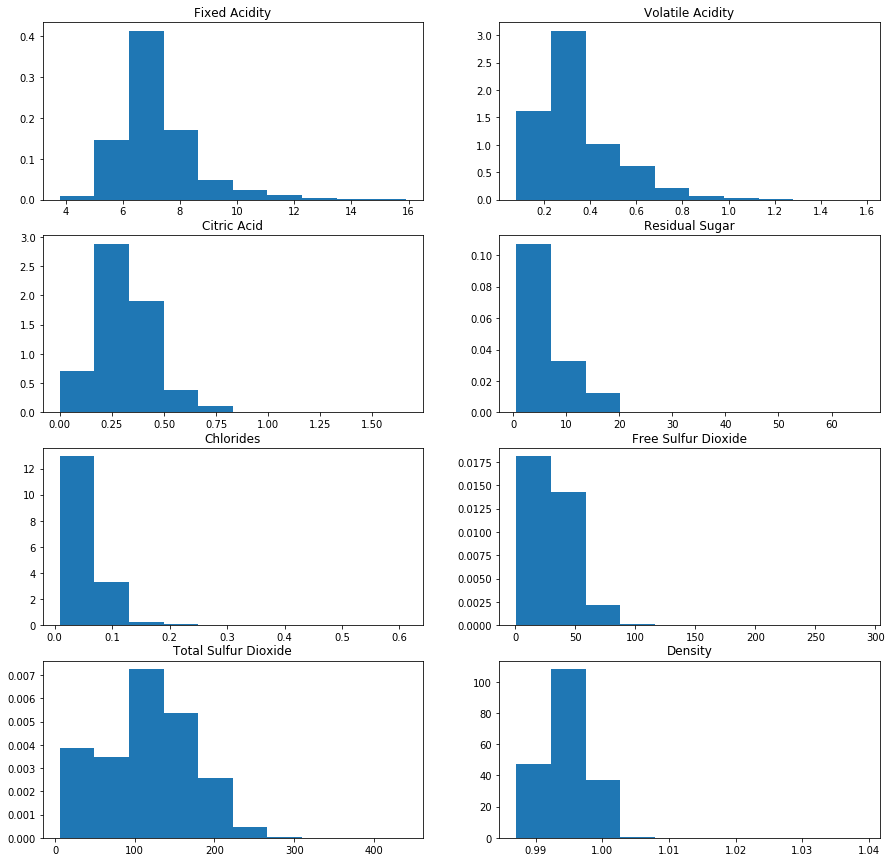

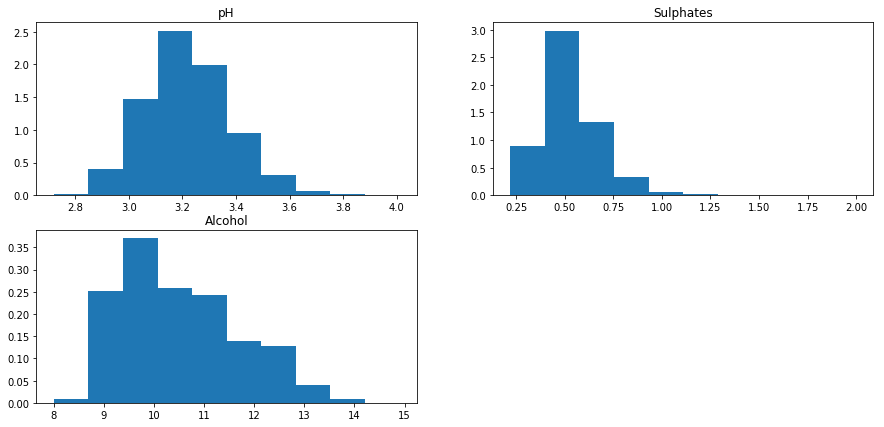

In [10]:
plt.figure(figsize=(15,15))
plt.subplot(421)
plt.hist(df['fixed acidity'],density=True)
plt.title("Fixed Acidity")
plt.subplot(422)
plt.hist(df['volatile acidity'],density=True)
plt.title("Volatile Acidity")
plt.subplot(423)
plt.hist(df['citric acid'],density=True)
plt.title("Citric Acid")
plt.subplot(424)
plt.hist(df['residual sugar'],density=True)
plt.title("Residual Sugar")
plt.subplot(425)
plt.hist(df['chlorides'],density=True)
plt.title("Chlorides")
plt.subplot(426)
plt.hist(df['free sulfur dioxide'],density=True)
plt.title("Free Sulfur Dioxide")
plt.subplot(427)
plt.hist(df['total sulfur dioxide'],density=True)
plt.title("Total Sulfur Dioxide")
plt.subplot(428)
plt.hist(df['density'],density=True)
plt.title("Density")
plt.show()
plt.figure(figsize=(15,7))
plt.subplot(221)
plt.hist(df['pH'],density=True)
plt.title("pH")
plt.subplot(222)
plt.hist(df['sulphates'],density=True)
plt.title("Sulphates")
plt.subplot(223)
plt.hist(df['alcohol'],density=True)
plt.title("Alcohol")
plt.show()

In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,-0.487218


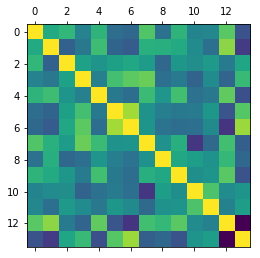

In [12]:
plt.matshow(df.corr())
plt.show()

> **b) Aborde este problema como si fuera de clasificación con multiples clases para predecir el valor de calidad de un vino, es decir, utilice las distintas caracterı́sticas fisioquı́micas presentes en los datos para estimar la etiqueta ¿Cuántas clases son y cuántos ejemplos hay por clase? ¿Qué sucede con predecir si un vino tiene calidad mínima (0) o máxima(10)? Además para el propósito académico de esta actividad cree un conjunto de pruebas (20%)  para evaluar la generalización final del modelo y otro de validación (20%) si estima conveniente. **

In [13]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

El problema se abordará como uno de clasificación, donde se tienen 7 posibles clases (calidades del 3 al 9) las cuales tienen un número desbalanceado de ejemplos, siendo 6 la clase más representada (con 2836 ejemplos) y 9 la calidad menos representada (con 5 ejemplos). Considerando los ejemplos, no se podría predecir si un vino cuenta con calidad mínima o máxima, debido a que no se cuentan con ejemplos que tengan dicha etiqueta, por lo que dicha clase no existirá en el entrenamiento y futuros ejemplos no podrán ser clasificados con dicha calidad.

In [14]:
y = df.quality.values
labels = np.unique(y)
df.drop(['quality'],axis=1,inplace=True)
X = df.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=42, stratify=y_test)

Se separan los conjuntos de entrenamiento, validación y pruebas, utilizando una selección estratificada para poder contar con ejemplos de las clases menos representadas en los tres conjuntos.

Se escalan los datos usando un escalador estándar, para así evitar que un atributo tenga más relevancia que otro solo por tener una magnitud mayor.

In [16]:
std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_val_scaled = std.transform(X_val)
X_test_scaled = std.transform(X_test)


> **c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Defina un Árbol *no regularizado* (como el que no tiene límites en su profundidad) y otro Árbol *regularizado* (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja), recuerde que las *decisiones* no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las clases mida la métrica F1-score sobre el conjunto de entrenamiento y de pruebas.**

Utilizando el conjunto de validación se sintonizarán los parámetros _*max depth*_, _*criterion*_, _*splitter*_, _*min samples split*_ y _*min samples leaf*_. Para decidir por un valor u otro se utilizará el F1-Score, el cual se define de la siguiente manera.

$$ F1 = \frac{2(\texttt{precision} \cdot \texttt{recall})}{(\texttt{precision} + \texttt{recall})}$$

El cual se puede interpretar como un promedio ponderado entre precisión (**[insertar definición acá]**) y recall (**[insertar definición acá]**). Debido a que el problema es multiclase, se puede calcular esta metrica para cada clase. Para determinar el parámetro a utilizar se analizará el score de cada clase y el score promedio entre todas las clases.

In [17]:
def do_tree(X_train, y_train, max_depth=None, criterion="gini",splitter="best",min_samples_split=2,min_samples_leaf=1):
    model = Tree()
    model.set_params(max_depth=max_depth,criterion=criterion,
                     splitter=splitter,min_samples_split=min_samples_split,
                     min_samples_leaf=min_samples_leaf,random_state=42)
    model.fit(X_train, y_train)
    return model

def do_validationTree(X_train, y_train,X_val,y_val,param_name,param_list,max_depth=None, criterion="gini",splitter="best",min_samples_split=2,min_samples_leaf=1):
    validation_score = []
    average = []
    if param_name == "max_depth":
        for i in param_list:
            model = do_tree(X_train, y_train, max_depth = i,criterion=criterion, splitter=splitter,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
            y_pred_val = model.predict(X_val)
            validation_score.append(list(f1_score(y_val, y_pred_val,labels=labels,average=None)))
            average.append(f1_score(y_val, y_pred_val,labels=labels,average="micro"))
    elif param_name == "criterion":
        for i in param_list:
            model = do_tree(X_train, y_train, max_depth=max_depth, criterion=i,splitter=splitter,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
            y_pred_val = model.predict(X_val)
            validation_score.append(list(f1_score(y_val, y_pred_val,labels=labels,average=None)))
            average.append(f1_score(y_val, y_pred_val,labels=labels,average="micro"))
    elif param_name == "splitter":
        for i in param_list:
            model = do_tree(X_train, y_train, max_depth=max_depth,criterion=criterion, splitter=i,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
            y_pred_val = model.predict(X_val)
            validation_score.append(list(f1_score(y_val, y_pred_val,labels=labels,average=None)))
            average.append(f1_score(y_val, y_pred_val,labels=labels,average="micro"))
    elif param_name == "min_samples_split":
        for i in param_list:
            model = do_tree(X_train, y_train, max_depth=max_depth,criterion=criterion, splitter=splitter,min_samples_split=i,min_samples_leaf=min_samples_leaf)
            y_pred_val = model.predict(X_val)
            validation_score.append(list(f1_score(y_val, y_pred_val,labels=labels,average=None)))
            average.append(f1_score(y_val, y_pred_val,labels=labels,average="micro"))
    elif param_name == "min_samples_leaf":
        for i in param_list:
            model = do_tree(X_train, y_train, max_depth=max_depth,criterion=criterion, splitter=splitter,min_samples_split=min_samples_split,min_samples_leaf=i)
            y_pred_val = model.predict(X_val)
            validation_score.append(list(f1_score(y_val, y_pred_val,labels=labels,average=None)))
            average.append(f1_score(y_val, y_pred_val,labels=labels,average="micro"))
    else:
        print("Nombre de parámetro no existente")
        return None
    return validation_score, average    

In [18]:
val_criterior, val_average = do_validationTree(X_train_scaled, y_train, X_val_scaled, y_val, "criterion", ["gini","entropy"])


In [19]:
def do_plot(labels,param_list,val_score):
    plt.figure(figsize=(10,6))
    plt.title("F1-Score por clase")
    plt.xlabel("Clase")
    plt.ylabel("F1-Score")
    for i in val_score:
        plt.plot(labels,i,"-o")
    plt.legend(param_list)
    plt.show()
    

El primer parámetro a sintonizar será la función de impureza que se utilizará. En este caso se utilizará el Índice de Gini y la Entropía de Shannon.

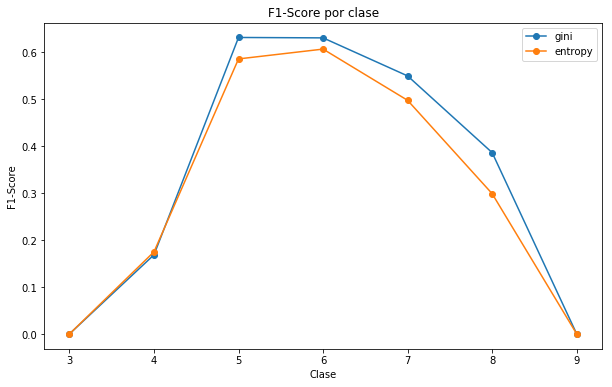

F1 promedio [0.5919938414164743, 0.5542725173210161]


In [20]:
do_plot(labels,["gini","entropy"],val_criterior)
print("F1 promedio",val_average)

Se observa que se obtienen mejores resultados utilizando el Índice de Gini que la Entropía de Shannon en la gran mayoría de las clases del problema, por lo que se utilizará dicha función de impureza. El F1-Score promedio obtenido es de 0.592.

El siguiente parámetro que se sintonizará es el tipo de _*split*_ a utilizar, donde las opciones es utilizar el mejor de todos o utilizar el mejor de un subconjunto elegido aleatoriamente. Obviamente se obtendrán mejores resultados al utilizar el mejor split de todos, pero lo que se busca es determinar si la diferencia entre los dos métodos es significativa, pues de tener una diferencia en resultados pequeña se podría utilizar el _*split random*_ para tener menos tiempo de ejecución.

In [21]:
diferences = []
splitList=["best","random"]
for i in range(100):
    val_split, avg_split = do_validationTree(X_train_scaled, y_train, X_val_scaled, y_val,
                                         "splitter", splitList,
                                         criterion="gini")
    diferences.append(avg_split[0]-avg_split[1])

In [22]:
np.mean(diferences)

0.026943802925327276

In [23]:
# sumRank, p_value = wilcoxon(diferences)
# print(sumRank)
# print(p_value)

En promedio las diferencias entre las dos maneras de decidir el _*split*_ es aproximadamente de 0.026. Dado que el tiempo de ejecución no es elevado, se decide utilizar el mejor split de todos.

Ahora se procede a sintonizar la profundidad máxima del árbol, donde se intentará con profundidades entre 2 y 20.

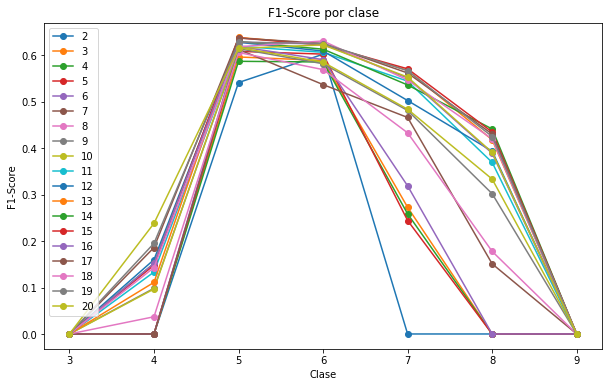

F1 promedio Maximo 0.5973826020015397 con una altura de 13
[0.5134719014626636, 0.5334872979214781, 0.5288683602771362, 0.541955350269438, 0.5465742879137798, 0.5296381832178599, 0.5396458814472671, 0.5558121632024634, 0.5604311008468053, 0.5804464973056197, 0.5781370284834488, 0.5973826020015397, 0.5850654349499615, 0.596612779060816, 0.5896843725943033, 0.5958429561200924, 0.5873749037721324, 0.5935334872979214, 0.5858352578906851]


In [24]:
depths = [x for x in range(2,21)]
val_depht, avg_depth = do_validationTree(X_train_scaled, y_train, X_val_scaled, y_val,
                                        "max_depth",depths,
                                        criterion="gini", splitter="best")
do_plot(labels,depths,val_depht)
print("F1 promedio Maximo "+ str(max(avg_depth))+" con una altura de "+str(depths[avg_depth.index(max(avg_depth))]))
print(avg_depth)

Se obtiene que la mejor profundidad para el árbol es de 13 niveles.

A continuación se sintoniza la cantidad mínima de ejemplos que se debe tener en un nodo para hacer un _*split*_ sobre él. Se utilizarán valores de 10 en 10 hasta 100.

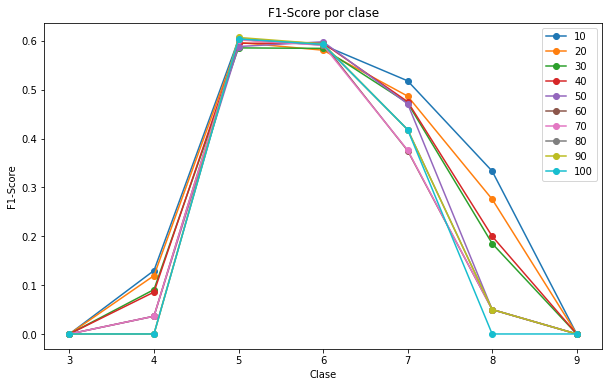

F1 promedio Maximo 0.5612009237875288
Número de ejemplos 10


In [25]:
splits = [x for x in range(10,101,10)]
val_splits, avg_splits = do_validationTree(X_train_scaled, y_train, X_val_scaled, y_val,
                                            "min_samples_split",splits,
                                            max_depth=13,
                                            criterion="gini", splitter="best")
do_plot(labels,splits,val_splits)
print("F1 promedio Maximo "+ str(max(avg_splits)))
print("Número de ejemplos",splits[avg_splits.index(max(avg_splits))])

El mejor número de ejemplos mínimos para realizar un split es de 10. Sin embargo, el F1 promedio encontrado es menor al encontrado cuando se sintonizó la altura, por lo que se utilizaran valores entre 2 y 10 para este parámetro.

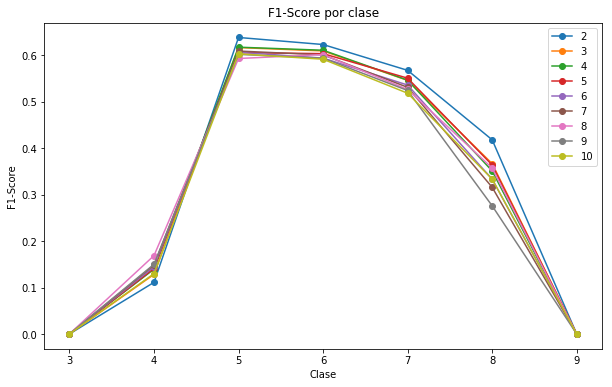

F1 promedio Maximo 0.5973826020015397
Número de ejemplos 2


In [26]:
splits = [x for x in range(2,11)]
val_splits, avg_splits = do_validationTree(X_train_scaled, y_train, X_val_scaled, y_val,
                                            "min_samples_split",splits,
                                            max_depth=13,
                                            criterion="gini", splitter="best")
do_plot(labels,splits,val_splits)
print("F1 promedio Maximo "+ str(max(avg_splits)))
print("Número de ejemplos",splits[avg_splits.index(max(avg_splits))])

Se encuentra que el mejor valor para este parámetro es el valor por defecto, por lo que se mantendrá así.

Finalmente se sintoniza la cantidad mínima de ejemplos con la que debe contar una hoja del árbol. Se utilizaran valores entre 10 y 100 de 10 en 10.

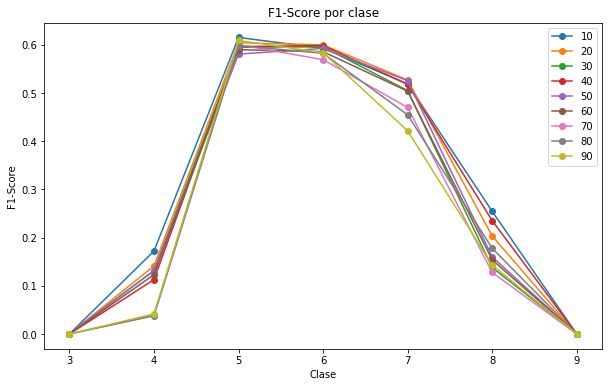

F1 promedio Maximo 0.5635103926096998
Número de ejemplos 10


In [27]:
leafs = [x for x in range(10,101,10)]
val_leaf, avg_leaf = do_validationTree(X_train_scaled, y_train, X_val_scaled, y_val,
                                            "min_samples_leaf",splits,
                                            max_depth=13,
                                            criterion="gini", splitter="best")
do_plot(labels,leafs,val_leaf)
print("F1 promedio Maximo "+ str(max(avg_leaf)))
print("Número de ejemplos",leafs[avg_leaf.index(max(avg_leaf))])

Se da el mismo caso anterior, por lo que se intentará con valores entre 1 y 10.

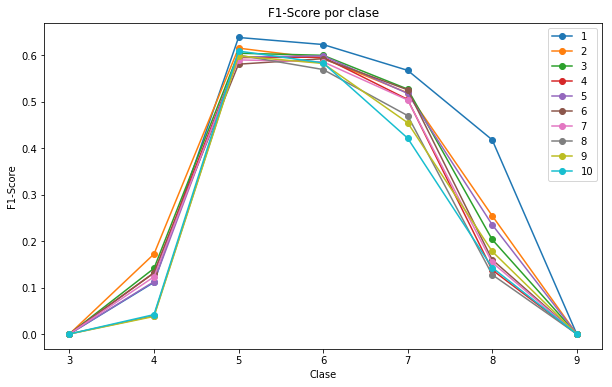

F1 promedio Maximo 0.5973826020015397
Número de ejemplos 1


In [28]:
leafs = [x for x in range(1,11)]
val_leaf, avg_leaf = do_validationTree(X_train_scaled, y_train, X_val_scaled, y_val,
                                            "min_samples_leaf",leafs,
                                            max_depth=13,
                                            criterion="gini", splitter="best")
do_plot(labels,leafs,val_leaf)
print("F1 promedio Maximo "+ str(max(avg_leaf)))
print("Número de ejemplos",leafs[avg_leaf.index(max(avg_leaf))])

Se obtiene el valor por defecto para este parámetro, por lo que se decide mantener esta opción.

El árbol finalmente utilizará los siguiente parámetros
- Criterio: Índice de Gini
- Splitter: Mejor Split
- Profundidad máxima: 13
- Min Samples Split: 2
- Min Samples Leaf: 1

Se procede a verificar el F1-Score en el conjunto de entrenamiento y de pruebas para este árbol y un árbol que utiliza los parámetros por defecto.

In [29]:
modelTreeReg = do_tree(X_train_scaled, y_train, max_depth=13, criterion="gini", splitter="best")
modelTree = do_tree(X_train_scaled, y_train)

In [30]:
pred_train_reg = modelTreeReg.predict(X_train_scaled)
pred_test_reg = modelTreeReg.predict(X_test_scaled)

pred_train = modelTree.predict(X_train_scaled)
pred_test = modelTree.predict(X_test_scaled)

In [31]:
print("F1 entrenamiento árbol regularizado",f1_score(y_train, pred_train_reg,labels=labels,average="micro"))
print("F1 pruebas árbol regularizado",f1_score(y_test,pred_test_reg,labels=labels,average="micro"))
print(" ")
print("F1 entrenamiento árbol sin regularizar",f1_score(y_train, pred_train,labels=labels,average="micro"))
print("F1 pruebas árbol sin regularizar",f1_score(y_test,pred_test,labels=labels,average="micro"))

F1 entrenamiento árbol regularizado 0.8884043099025141
F1 pruebas árbol regularizado 0.5646153846153846
 
F1 entrenamiento árbol sin regularizar 1.0
F1 pruebas árbol sin regularizar 0.566923076923077


Se observa que el árbol sin regularizar obtiene ligeramente mejores resultados, pero en el árbol regularizado se observa menor _*overfitting*_, lo que es de esperar, pues el objetivo de ajustar los parámetros es mejorar la generalización del modelo. En este caso, el error de validación no fue un buen estimador del comportamiento en el conjunto de pruebas.

> **d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de *Bagging*, compare el Árbol *no regularizado* con el *regularizado* (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.**

Se entrena un ensamblado de árboles mediante la técnica Bagging, esta técnica re-muestrea el conjunto de entrenamiento utilizando Bootstrap, lo cual reduce la varianza del error de predicción a medida que se aumenta el número de modelos utilizados como predictores de la técnica. Esta técnica de ensamblado se utilizará con un árbol de clasificación como base learner, donde se realizarán pruebas con un árbol no regularizado y uno regularizado (el del item anterior). Como esta técnica reduce la varianza, y tiende a funcionar mejor con modelos con alta varianza, se deberían obtener mejores resultados al utilizar el árbol no-regularizado.  

In [32]:
estimators = [x for x in range(1,51)]
trainsF1 = []
testsF1 = []
trainsRegF1 = []
testsRegF1 = []

for i in estimators:
    #Inicializamos los modelos regularizados y no regularizados
    baggingReg = BaggingClassifier(base_estimator=Tree(max_depth=13),
                                  n_estimators=i,n_jobs=-1)
    bagging = BaggingClassifier(base_estimator=Tree(),
                               n_estimators=i,n_jobs=-1)
    #Entrenamiento de los modelos
    baggingReg.fit(X_train_scaled,y_train)
    bagging.fit(X_train_scaled,y_train)
    #predicciones
    pred_trainReg = baggingReg.predict(X_train_scaled)
    pred_testReg = baggingReg.predict(X_test_scaled)
    pred_train = bagging.predict(X_train_scaled)
    pred_test = bagging.predict(X_test_scaled)
    #F1 Scores :D
    trainsRegF1.append(f1_score(y_train,pred_trainReg,labels=labels,average="micro"))
    testsRegF1.append(f1_score(y_test,pred_testReg,labels=labels,average="micro"))
    trainsF1.append(f1_score(y_train,pred_train,labels=labels,average="micro"))
    testsF1.append(f1_score(y_test,pred_test,labels=labels,average="micro"))
    
    

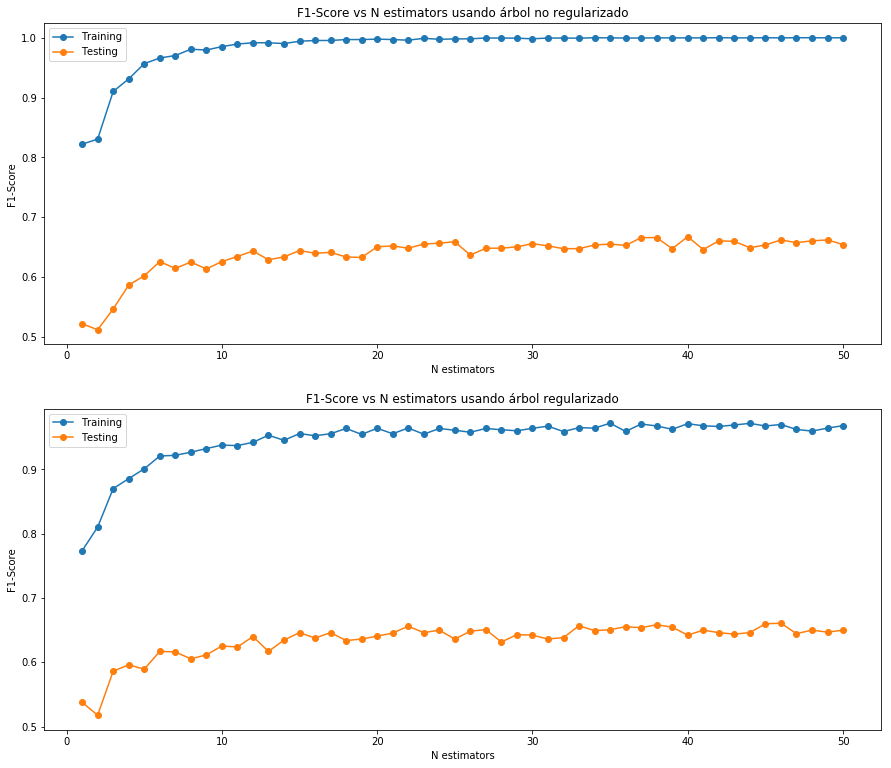

Máximo test regularizado 0.6607692307692308
N estimators: 46
Valor del árbol no regularizado 0.6623076923076923
 
Máximo test no regularizado 0.6676923076923077
N estimators: 40
Valor del árbol regularizado 0.6423076923076924


In [33]:
plt.figure(figsize=(15,13))
plt.subplot(211)
plt.title("F1-Score vs N estimators usando árbol no regularizado")
plt.ylabel("F1-Score")
plt.xlabel("N estimators")
plt.plot(estimators,trainsF1,"-o")
plt.plot(estimators,testsF1,"-o")
plt.legend(["Training","Testing"])
plt.subplot(212)
plt.title("F1-Score vs N estimators usando árbol regularizado")
plt.ylabel("F1-Score")
plt.xlabel("N estimators")
plt.plot(estimators,trainsRegF1,"-o")
plt.plot(estimators,testsRegF1,"-o")
plt.legend(["Training","Testing"])

plt.show()

print("Máximo test regularizado",max(testsRegF1))
print("N estimators:",estimators[testsRegF1.index(max(testsRegF1))])
print("Valor del árbol no regularizado",testsF1[estimators.index(estimators[testsRegF1.index(max(testsRegF1))])])
print(" ")
print("Máximo test no regularizado",max(testsF1))
print("N estimators:",estimators[testsF1.index(max(testsF1))])
print("Valor del árbol regularizado",testsRegF1[estimators.index(estimators[testsF1.index(max(testsF1))])])


Se ve que hay Overfitting, pero sin llegar inmediatamente a clasificar correctamente todos los ejemplos de entrenamiento (f1 score igual a 1), aumentando lentamente conforme aumenta el número de estimadores. Lo anterior se debe a que la técnica de Bagging controla el Overfitting al momento de ensamblar, debido a la aleatoriedad de los conjuntos utilizados para entrenar cada preditor.

Para evaluar el desempeño se calcula el máximo f1 score para ambos tipos de árboles, entregando también el f1 score que obtiene el árbol contrario cuando utiliza la cantidad de predictores para la cual es otro árbol obtuvo dicho máximo. Como se mencionó anteriormente, el árbol no regularizado obtiene mejores resultados en ambos casos, debido principalmente a la varianza que tienen dichos modelos con respecto al error de predicción.

>** e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de *AdaBoost*, compare el Árbol *no regularizado* con el *regularizado* (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)* ¿Se visualiza *overfitting*? ¿Qué técnica se utiliza, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).**

Ahora se utiliza una técnica de ensamblado basada en Boosting. En este caso, se entrenan clasificadores de manera secuencial, los cuales se entrenan para clasificar los ejemplos en los cuales los clasificadores anteriores fallaron en entregar una respuesta correcta. Para esto toman una muestra desde el conjunto de entrenamiento, de tal manera que se favorezca la elección de ejemplos donde los clasificadores anteriores fallaron en entregar una solución. Para realizar lo anterior, ajustan la distribución con la que se muestrean los datos de entrenamiento según pesos asignados a cada clasificador, ajuste que se realiza de manera adaptativa por cada iteración. Luego, la manera de clasificar un dato se realiza según un voto ponderado por clasificador, donde la ponderación depende del grado de experticie que tenga dicho clasificador con ese tipo de ejemplos. Este tipo de técnica logra bajar el error de entrenamiento a medida que aumenta el número de estimadores involucrados, lo que reduce el sesgo del error de predicción, es decir, la diferencia media entre el valor verdadero y el valor que predice el modelo, considerando diferentes realizaciones del conjunto de entrenamiento, por lo que esta técnica funciona mejor con modelos altamente regularizados.

En el caso de técnicas de Boosting se tiene que la dimensión VC, relacionada con la complejidad del modelo, aumenta linealmente con el número de predictores en el peor caso, lo cual sumado a que el error de entrenamiento se reduce muy rápido, puede provocar Overfitting, haciendo que sea una preocupación al utilizar esta técnica.

In [34]:
estimators = [x for x in range(1,51)]
trainsF1 = []
testsF1 = []
trainsRegF1 = []
testsRegF1 = []

for i in estimators:
    #Inicializamos los modelos regularizados y no regularizados
    adaReg = AdaBoostClassifier(base_estimator=Tree(max_depth=13),
                                  n_estimators=i)
    ada = AdaBoostClassifier(base_estimator=Tree(),
                               n_estimators=i)
    #Entrenamiento de los modelos
    adaReg.fit(X_train_scaled,y_train)
    ada.fit(X_train_scaled,y_train)
    #predicciones
    pred_trainReg = adaReg.predict(X_train_scaled)
    pred_testReg = adaReg.predict(X_test_scaled)
    pred_train = ada.predict(X_train_scaled)
    pred_test = ada.predict(X_test_scaled)
    #F1 Scores :D
    trainsRegF1.append(f1_score(y_train,pred_trainReg,labels=labels,average="micro"))
    testsRegF1.append(f1_score(y_test,pred_testReg,labels=labels,average="micro"))
    trainsF1.append(f1_score(y_train,pred_train,labels=labels,average="micro"))
    testsF1.append(f1_score(y_test,pred_test,labels=labels,average="micro"))
    
    

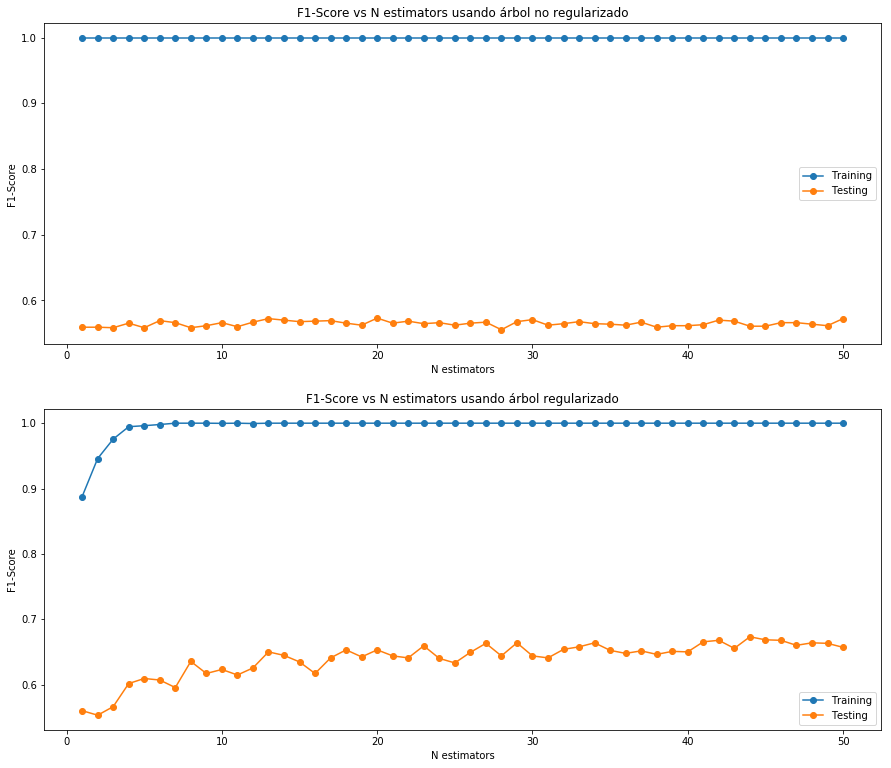

Máximo test regularizado 0.6730769230769231
N estimators: 44
Valor del árbol no regularizado 0.5607692307692308
 
Máximo test no regularizado 0.573076923076923
N estimators: 20
Valor del árbol regularizado 0.6530769230769231


In [35]:
plt.figure(figsize=(15,13))
plt.subplot(211)
plt.title("F1-Score vs N estimators usando árbol no regularizado")
plt.ylabel("F1-Score")
plt.xlabel("N estimators")
plt.plot(estimators,trainsF1,"-o")
plt.plot(estimators,testsF1,"-o")
plt.legend(["Training","Testing"])
plt.subplot(212)
plt.title("F1-Score vs N estimators usando árbol regularizado")
plt.ylabel("F1-Score")
plt.xlabel("N estimators")
plt.plot(estimators,trainsRegF1,"-o")
plt.plot(estimators,testsRegF1,"-o")
plt.legend(["Training","Testing"])

plt.show()

print("Máximo test regularizado",max(testsRegF1))
print("N estimators:",estimators[testsRegF1.index(max(testsRegF1))])
print("Valor del árbol no regularizado",testsF1[estimators.index(estimators[testsRegF1.index(max(testsRegF1))])])
print(" ")
print("Máximo test no regularizado",max(testsF1))
print("N estimators:",estimators[testsF1.index(max(testsF1))])
print("Valor del árbol regularizado",testsRegF1[estimators.index(estimators[testsF1.index(max(testsF1))])])


Se observa Overfitting inmediato en el caso del árbol no regularizado y un Overfitting algo más lento, a medida que se aumenta la cantidad de estimadores, en el caso del árbol regularizado. Se realizan los mismos experimentos que en el caso de la técnica de Boosting, y se obtienen mejores resultados, en ambos casos, para el árbol regularizado, lo cual era de esperar debido a la naturaleza de esta técnica.

>** f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: *Random Forest*, compare el Árbol *no regularizado* con el *regularizado* ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen el F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.**

Ahora se utiliza la técnica Random Forest, la cual intenta reducir la varianza del error de predicción cuando no se asume que los clasificadores utilizados como predictores son completamente independientes entre si. La idea anterior la logra agregando aleatoriedad a los atributos utilizados en el entrenamiento de cada predictor, lo que hace que se reduzca la varianza asociada a un término que no disminuye con el aumento de clasificadores, el cual aparece cuando no se considera el supuesto de independencia.

Al tratarse de una técnica basada en Bootstrap, al igual que Bagging, se esperan los mismos resultados que en dicho ítem, es decir, que el árbol no regularizado obtenga mejores resultados que el árbol regularizado, además de observar menor Overfitting que en el caso de la técnica de Boosting.

In [36]:
estimators = [x for x in range(1,51)]
trainsF1 = []
testsF1 = []
trainsRegF1 = []
testsRegF1 = []

for i in estimators:
    #Inicializamos los modelos regularizados y no regularizados
    randomFReg = RandomForestClassifier(max_depth=13,n_estimators=i,n_jobs=-1)
    randomF = RandomForestClassifier(n_estimators=i,n_jobs=-1)
    #Entrenamiento de los modelos
    randomFReg.fit(X_train_scaled,y_train)
    randomF.fit(X_train_scaled,y_train)
    #predicciones
    pred_trainReg = randomFReg.predict(X_train_scaled)
    pred_testReg = randomFReg.predict(X_test_scaled)
    pred_train = randomF.predict(X_train_scaled)
    pred_test = randomF.predict(X_test_scaled)
    #F1 Scores :D
    trainsRegF1.append(f1_score(y_train,pred_trainReg,labels=labels,average="micro"))
    testsRegF1.append(f1_score(y_test,pred_testReg,labels=labels,average="micro"))
    trainsF1.append(f1_score(y_train,pred_train,labels=labels,average="micro"))
    testsF1.append(f1_score(y_test,pred_test,labels=labels,average="micro"))
    
    

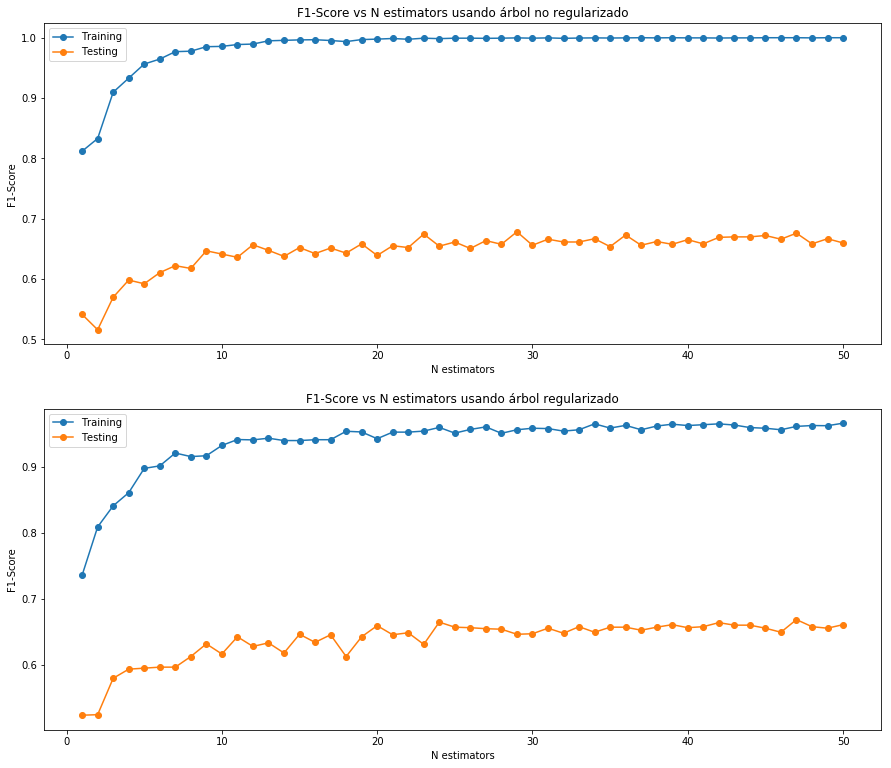

Máximo test regularizado 0.6684615384615384
N estimators: 47
Valor del árbol no regularizado 0.6761538461538461
 
Máximo test no regularizado 0.6784615384615384
N estimators: 29
Valor del árbol regularizado 0.6461538461538462


In [37]:
plt.figure(figsize=(15,13))
plt.subplot(211)
plt.title("F1-Score vs N estimators usando árbol no regularizado")
plt.ylabel("F1-Score")
plt.xlabel("N estimators")
plt.plot(estimators,trainsF1,"-o")
plt.plot(estimators,testsF1,"-o")
plt.legend(["Training","Testing"])
plt.subplot(212)
plt.title("F1-Score vs N estimators usando árbol regularizado")
plt.ylabel("F1-Score")
plt.xlabel("N estimators")
plt.plot(estimators,trainsRegF1,"-o")
plt.plot(estimators,testsRegF1,"-o")
plt.legend(["Training","Testing"])

plt.show()

print("Máximo test regularizado",max(testsRegF1))
print("N estimators:",estimators[testsRegF1.index(max(testsRegF1))])
print("Valor del árbol no regularizado",testsF1[estimators.index(estimators[testsRegF1.index(max(testsRegF1))])])
print(" ")
print("Máximo test no regularizado",max(testsF1))
print("N estimators:",estimators[testsF1.index(max(testsF1))])
print("Valor del árbol regularizado",testsRegF1[estimators.index(estimators[testsF1.index(max(testsF1))])])


Como se mencionó anteriormente, en ambos casos de observa como el Overfitting aumenta levemente. Se realizan los mismos experimentos que en el caso de la técnica Bagging, donde se obtienen mejores resultados para el árbol no regularizado en ambos casos. Además, se observa una leve mejoría en el F1 Score obtenido para la técnica de Bagging en el caso del máximo para el árbol no regularizado ($\aprox 0.001).

> **g) Verifique que el *OOB error* (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compárelo con el error calculado sobre el conjunto de pruebas y validación (o en su defecto *cross validation*).**

Dada la naturaleza de las técnicas basadas que utilizan _Bootstrap_, para cada clasificador se tiene una cantidad de ejemplos que no fueron utilizados para entrenar el modelo, los cuales pueden ser utilizados como un pseudo conjunto de validación. Este tipo de ejemplos sirven para calcular el determinado _Out Of Bag error_ (_OOB error_), el cual puede ser utilizado como una aproximación del error de pruebas. Las métricas basadas en OOB se calculan viendo la diferencia en el error que se obtiene cuando se realiza un split en un árbol, considerando los ejemplos no vistos por dicho árbol, donde para calcular una métrica final se acumulan los puntajes de cada uno de los árboles y de cada nodo interno de cada árbol.

Se calculará el _*OOB error*_ para los ensambladores _*Random Forest*_ y _*Bagging*_, la cantidad de estimadores a utilizar será la cantidad que obtuvo el mejor F1-Score en los experimentos anteriores.

In [38]:
#TENGO QUE CAMBIAR ESTO PARA GRAFICAR ERROR DE TESTING, OOB ERROR y ERROR DE ENTRENAMIENTO EN FUNCIÓN DEL NÚMERO DE ESTIMADORES.
baggingReg = BaggingClassifier(base_estimator=Tree(max_depth=13),
                                  n_estimators=42,n_jobs=-1,
                              oob_score=True)
baggingReg.fit(X_train_scaled,y_train)

bagging = BaggingClassifier(base_estimator=Tree(),
                               n_estimators=42,n_jobs=-1,
                           oob_score=True)
bagging.fit(X_train_scaled,y_train)

randomFReg = RandomForestClassifier(max_depth=13,n_estimators=46,n_jobs=-1,
                                   oob_score=True)
randomFReg.fit(X_train_scaled,y_train)

randomF = RandomForestClassifier(n_estimators=46,n_jobs=-1,
                                oob_score=True)
randomF.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=46, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [39]:
oob_errorRFreg = 1 - randomFReg.oob_score_
val_errorRFreg = 1 - randomFReg.score(X_val_scaled,y_val)
test_errorRFreg = 1 - randomFReg.score(X_test_scaled, y_test)
print("Random Forest regularizado")
print("OOB error:",oob_errorRFreg)
print("Val error:",val_errorRFreg)
print("Test error:",test_errorRFreg)

Random Forest regularizado
OOB error: 0.3727552591072345
Val error: 0.3548883756735951
Test error: 0.35


In [40]:
oob_errorRF = 1 - randomF.oob_score_
val_errorRF = 1 - randomF.score(X_val_scaled,y_val)
test_errorRF = 1 - randomF.score(X_test_scaled, y_test)
print("Random Forest no regularizado")
print("OOB error:",oob_errorRF)
print("Val error:",val_errorRF)
print("Test error:",test_errorRF)

Random Forest no regularizado
OOB error: 0.3660851718830169
Val error: 0.33564280215550424
Test error: 0.3261538461538461


In [41]:
oob_errorBagReg = 1 - baggingReg.oob_score_
val_errorBagReg = 1 - baggingReg.score(X_val_scaled,y_val)
test_errorBagReg = 1 - baggingReg.score(X_test_scaled, y_test)
print("Bagging regularizado")
print("OOB error:",oob_errorBagReg)
print("Val error:",val_errorBagReg)
print("Test error:",test_errorBagReg)

Bagging regularizado
OOB error: 0.37326834273986664
Val error: 0.3448806774441878
Test error: 0.3438461538461538


In [42]:
oob_errorBag = 1 - bagging.oob_score_
val_errorBag = 1 - bagging.score(X_val_scaled,y_val)
test_errorBag = 1 - bagging.score(X_test_scaled, y_test)
print("Bagging no regularizado")
print("OOB error:",oob_errorBag)
print("Val error:",val_errorBag)
print("Test error:",test_errorBag)

Bagging no regularizado
OOB error: 0.3742945100051308
Val error: 0.33487297921478065
Test error: 0.3353846153846154


> **h) Entrene alguna otra máquina de aprendizaje, elegida por usted de entre todas las vistas en el curso, para resolver el problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el *F1-scor*e obtenido por los algoritmos anteriores ¿Se logra una mejora? ¿Por qué?**

Como los modelos entrenados anteriormente no requieren de mucho tiempo de entrenamiento se deciden entrenar todos los modelos de clasificación vistos durante el curso (menos árboles de clasificiación), para así ver cual de todos obtiene un mejor F1-score. En particular se entrenará un Perceptrón, un Regresor Logístico, LDA, QDA, SVM con kernel RBF y una Red Neuronal de una capa oculta.

Para cada modelo se sintonizarán alguno de sus parámetros utilizando el conjunto de validación; el parámetro de regularización para el Perceptron, el Regresor Logístico, QDA y SVM; el número de componentes que se utilizarán para LDA; y el número de neuronas en la capa oculta para la Red Neuronal.

In [43]:
#Perceptron
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
perceptronScores = []
perceptronTrain = []
for i in Cs:
    perceptronModel = Perceptron(penalty='l2',alpha=i)
    perceptronModel.fit(X_train_scaled,y_train)
    predPercep = perceptronModel.predict(X_val_scaled)
    trainPercep = perceptronModel.predict(X_train_scaled)
    perceptronScores.append(f1_score(y_val,predPercep,labels=labels,average="micro"))
    perceptronTrain.append(f1_score(y_train,trainPercep,labels=labels,average="micro"))
print("Max F1-Score Val",max(perceptronScores))   
print("C:",Cs[perceptronScores.index(max(perceptronScores))]) 
print("F1-Score train",perceptronTrain[perceptronScores.index(max(perceptronScores))])

Max F1-Score Val 0.4488067744418784
C: 0.001
F1-Score train 0.4640841457157517


In [44]:
#Regresion Logistic

logisticScores = []
logisticTrain = []
for i in Cs:
    logisticModel = LogisticRegression(C=i)
    logisticModel.fit(X_train_scaled,y_train)
    pred = logisticModel.predict(X_val_scaled)
    predTrain = logisticModel.predict(X_train_scaled)
    logisticScores.append(f1_score(y_val,pred,labels=labels,average="micro"))
    logisticTrain.append(f1_score(y_train,predTrain,labels=labels,average="micro"))
print("Max F1-Score",max(logisticScores))   
print("C:",Cs[logisticScores.index(max(logisticScores))])
print("F1-Score train",logisticTrain[logisticScores.index(max(logisticScores))])

Max F1-Score 0.5265588914549654
C: 0.01
F1-Score train 0.5461775269368907


In [45]:
#LDA
n_components = [2,3,4,5,6]
LDAScores = []
LDATrain = []
for i in n_components:
    LDAModel = LDA(n_components=i)
    LDAModel.fit(X_train_scaled,y_train)
    predLDA = LDAModel.predict(X_val_scaled)
    predLDATrain = LDAModel.predict(X_train_scaled)
    LDAScores.append(f1_score(y_val,predLDA,labels=labels,average="micro"))
    LDATrain.append(f1_score(y_train,predLDATrain,labels=labels,average="micro"))
print("Max F1-Score",max(LDAScores))   
print("N_Components:",n_components[LDAScores.index(max(LDAScores))])
print("F1-Score train",LDATrain[LDAScores.index(max(LDAScores))])    

Max F1-Score 0.5180908391070054
N_Components: 2
F1-Score train 0.5420728578758338


In [46]:
#QDA
regsParam = [0.001,0.01,0.1,1,10,100]
QDAScores = []
QDATrain = []
for i in regsParam:
    QDAModel = QDA(reg_param=i)
    QDAModel.fit(X_train_scaled,y_train)
    predQDA = QDAModel.predict(X_val_scaled)
    predQDATrain = QDAModel.predict(X_train_scaled)
    QDAScores.append(f1_score(y_val,predQDA,labels=labels,average="micro"))
    QDATrain.append(f1_score(y_train,predQDATrain,labels=labels,average="micro"))
    
print("Max F1-Score",max(QDAScores))   
print("Reg Param:",regsParam[QDAScores.index(max(QDAScores))])
print("F1-Score train",QDATrain[QDAScores.index(max(QDAScores))])     

Max F1-Score 0.4857582755966128
Reg Param: 0.1
F1-Score train 0.525910723447922


In [47]:
#SVC
svcScores = []
svcTrain = []
for i in Cs:
    svcModel = SVC(C=i)
    svcModel.fit(X_train_scaled,y_train)
    predSVC = svcModel.predict(X_val_scaled)
    predSVCTrain = svcModel.predict(X_train_scaled)
    svcScores.append(f1_score(y_val,predSVC,labels=labels,average="micro"))
    svcTrain.append(f1_score(y_train,predSVCTrain,labels=labels,average="micro"))
print("Max F1-Score",max(svcScores))   
print("C:",Cs[svcScores.index(max(svcScores))])    
print("F1-Score train",svcTrain[svcScores.index(max(svcScores))])

Max F1-Score 0.5696689761354888
C: 10
F1-Score train 0.6890713186249359


In [48]:
def to_label(y_prob):
    y_pred = []
    for i in y_prob:
        aux = list(i)
        y_pred.append(labels[aux.index(max(aux))])
    return y_pred    

In [49]:
pesos = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
dictPesos = {}
for i in range(len(pesos)):
    dictPesos[i] = pesos[i]

In [50]:
yshape = X_train_scaled.shape[1]
encoder = LabelEncoder()
encoder.fit(y_train)
dummy_y = encoder.transform(y_train)
dummy_y = np_utils.to_categorical(dummy_y)

neurons = [2**x for x in range(2,10)]
f1scores = []
f1scoresTrain = []

for i in neurons:
    neuralModel = Sequential()
    neuralModel.add(Dense(units=yshape, input_dim=yshape, activation='relu'))
    neuralModel.add(Dense(units=i,activation='relu'))
    neuralModel.add(Dense(units=dummy_y.shape[1], activation='softmax'))
    neuralModel.compile(loss="categorical_crossentropy",optimizer='adam')
    neuralModel.fit(X_train_scaled,dummy_y,batch_size=32,epochs=50,verbose=0)
    pred = neuralModel.predict(X_val_scaled)
    pred = to_label(pred)
    predTrain = to_label(neuralModel.predict(X_train_scaled))
    f1scores.append(f1_score(y_val,pred,labels=labels,average="micro"))
    f1scoresTrain.append(f1_score(y_train,predTrain,labels=labels,average="micro"))

print("Max F1-score "+str(max(f1scores))+" con las siguientes neuronas "+str(neurons[f1scores.index(max(f1scores))])) 
print("F1-Score train",f1scoresTrain[f1scores.index(max(f1scores))])

Max F1-score 0.5696689761354888 con las siguientes neuronas 128
F1-Score train 0.6254489481785531


Los modelos resultantes son los siguientes:

- Perceptron con $\alpha = 0.001$
- Regresor Logístico con $C = 0.01$
- LDA con 2 componentes
- QDA con Reg Param $0.1$
- SVM con $C = 10$
- Red Neural con $16$ neuronas en la capa oculta

Por lo que se entrenarán dichos modelos para obtener su F1-Score en el conjunto de pruebas.

In [51]:
perceptronModel = Perceptron(penalty='l2', alpha=0.001)
perceptronModel.fit(X_train_scaled, y_train)

regresorModel = LogisticRegression(C=0.01)
regresorModel.fit(X_train_scaled, y_train)

LDAModel = LDA(n_components=2)
LDAModel.fit(X_train_scaled, y_train)

QDAModel = QDA(reg_param=0.1)
QDAModel.fit(X_train_scaled,y_train)

SVMModel = SVC(kernel='rbf',C=10)
SVMModel.fit(X_train_scaled,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
neuralModel = Sequential()
neuralModel.add(Dense(units=yshape, input_dim=yshape, activation='relu'))
neuralModel.add(Dense(units=16,activation='relu'))
neuralModel.add(Dense(units=dummy_y.shape[1], activation='softmax'))
neuralModel.compile(loss="categorical_crossentropy",optimizer='adam')
neuralModel.fit(X_train_scaled,dummy_y,batch_size=32,epochs=50,verbose=0)

In [53]:
#Calculate Prediction
predPerceptron = perceptronModel.predict(X_test_scaled)
predRegresor = regresorModel.predict(X_test_scaled)
predLDA = LDAModel.predict(X_test_scaled)
predQDA = QDAModel.predict(X_test_scaled)
predSVM = SVMModel.predict(X_test_scaled)
predNeural = to_label(neuralModel.predict(X_test_scaled))

In [54]:
#Calculate Test F1-Score
print("F1-Score Perceptron",f1_score(y_test,predPerceptron,labels=labels,average="micro"))
print("F1-Score Regresor Logístico",f1_score(y_test,predRegresor,labels=labels,average="micro"))
print("F1-Score LDA",f1_score(y_test,predLDA,labels=labels,average="micro"))
print("F1-Score QDA",f1_score(y_test,predQDA,labels=labels,average="micro"))
print("F1-Score SVM",f1_score(y_test,predSVM,labels=labels,average="micro"))
print("F1-Score Neural Network",f1_score(y_test,predNeural,labels=labels,average="micro"))

F1-Score Perceptron 0.45615384615384613
F1-Score Regresor Logístico 0.5338461538461539
F1-Score LDA 0.5476923076923077
F1-Score QDA 0.4969230769230769
F1-Score SVM 0.58
F1-Score Neural Network 0.5561538461538461


Quien obtiene mejores resultados es SVM con kernel RBF y parámetro de regularización $C = 10$, con un F1-Score de $0.58$, el cual solo supera los peores resultados obtenidos con la técnica _*Adaboost*_, siendo superado por los mejores resultados de esta técnica y todos los resultados obtenidos para las técnicas _*Bagging*_ y _*Random Forest*_. Esto es de esperar, debido a que _**[INSERTE EXPLICACIÓN TEÓRICA ACÁ]**_

> **i) Compare y analice las distintas maneras con las que se resolvió el problema definido en b), por ejemplo incluya las decisiones que conlleva y los resultados que reflejan.**

Para resolver el problema se siguieron los siguientes pasos.

1. **Una vez procesado el dataset de entrada se intenta resolver el problema con un árbol de clasificación no regularizado y uno regularizado.**
2. **Luego se intentó resolver el problema con 3 técnicas de ensamblado distintas; 2.1 _Bagging_, 2.2 _AdaBoost_ y 2.3 _Random Forest_.**
3. **Finalmente se entrenan los distintos métodos de clasificación vistos en clases, para comparar sus resultados con los métodos de ensamblado.**

En el primer paso, una vez tomada la decisión del modelo a utilizar, se debe decidir si se sintonizarán los parámetros y de ser así cuales de los hiperparámetros serán ajustados. El hecho de regularizar un árbol sirve para aumentar la generalización del modelo, lo cual dado el desbalance entre las clases del problema puede no ser muy bueno si se utiliza la _accuracy_ como métrica, debido que el modelo preferirá clasificar todos los ejemplos con etiquetas de las clases con mayor frecuencia. Es por eso que en este caso se utiliza el F1-score, que es un promedio entre _accuracy_ y _recall_, pues de utilizar sólo _recall_ el modelo solo clasificaría los ejemplo con las clases con menos frecuencia. El efecto de la regularización se puede observar en las siguientes matrices de confusión.

In [55]:
modelTreeReg = do_tree(X_train_scaled, y_train, max_depth=13, criterion="gini", splitter="best")
modelTree = do_tree(X_train_scaled,y_train)

predTreeReg = modelTreeReg.predict(X_test_scaled)
predTree = modelTree.predict(X_test_scaled)
cmReg = confusion_matrix(y_test,predTreeReg)
cm = confusion_matrix(y_test,predTree)

predValTreeReg = modelTreeReg.predict(X_val_scaled)
predValTree = modelTree.predict(X_val_scaled)
cmRegVal = confusion_matrix(y_val,predValTreeReg)
cmVal = confusion_matrix(y_val,predValTree)

print("Matriz de Confusion Regularizado conjunto de validación")
print(cmRegVal)
print("Diagonal reg",np.diag(cmRegVal))
print("Suma",sum(np.diag(cmRegVal)))
print("Matriz de Confusion No Regularizado conjunto de validación")
print(cmVal)
print("Diagonal",np.diag(cmVal))
print("Suma",sum(np.diag(cmVal)))

print("Matriz de Confusion Regularizado conjunto de pruebas")
print(cmReg)
print("Diagonal reg",np.diag(cmReg))
print("Suma",sum(np.diag(cmReg)))
print("Matriz de Confusion No Regularizado conjunto de pruebas")
print(cm)
print("Diagonal",np.diag(cm))
print("Suma",sum(np.diag(cm)))

Matriz de Confusion Regularizado conjunto de validación
[[  0   0   2   4   0   0   0]
 [  0   4  23  12   4   0   0]
 [  2  11 284 115  15   0   0]
 [  0  13 133 352  60   9   0]
 [  0   1  18  70 122   5   0]
 [  0   0   3   9  13  14   0]
 [  0   0   0   1   0   0   0]]
Diagonal reg [  0   4 284 352 122  14   0]
Suma 776
Matriz de Confusion No Regularizado conjunto de validación
[[  0   0   3   2   1   0   0]
 [  0   7  19  10   5   2   0]
 [  2  18 271 119  12   5   0]
 [  3  12 120 358  60  14   0]
 [  0   3  18  68 116  11   0]
 [  0   0   0  11  11  17   0]
 [  0   0   0   0   1   0   0]]
Diagonal [  0   7 271 358 116  17   0]
Suma 769
Matriz de Confusion Regularizado conjunto de pruebas
[[  0   1   4   0   1   0   0]
 [  1   8  16  17   1   0   0]
 [  1   7 269 127  19   5   0]
 [  1   9 136 327  81  14   0]
 [  1   0  19  70 118   8   0]
 [  0   0   4   8  14  12   0]
 [  0   0   0   1   0   0   0]]
Diagonal reg [  0   8 269 327 118  12   0]
Suma 734
Matriz de Confusion No Reg

Se observa que en ambos conjuntos (validación y pruebas) el modelo regularizado favorece la correcta clasificación de las clases con mayor frecuencia, mientras que el árbol no regularizado tiende a favorecer la correcta clasificación de las clases menos frecuentes, disminuyendo la efectividad del clasificador con respecto a las clases más frecuentes.

En el segundo paso, una vez decidido que se utilizará un método de ensamblado, se debe decidir por un método basado en Bootstrap (Bagging o Random Forest) o un método basado en Boosting (Adaboost), al menos en el ambito de lo desarrollado en este taller. La elección dependerá de que se quiera hacer con el modelo; si se quiere minimizar la varianza del modelo, es decir, cuanto cambian las predicciones del modelo respecto a la media cuando el conjunto de ejemplos varía, o si se desea minimizar el sesgo del modelo, es decir, reducir la diferencia media entre el valor verdadero y el valor que predice el modelo, considerando diferentes realizaciones del conjunto de entrenamiento. Esta elección conlleva la elección de un learner base para el modelo, donde para los métodos basados en Bootstrap es recomendable utilizar un modelo con alta varianza, como un árbol de decisión no regularizado (o poco regularizado), y si se usa un método de Boosting, el cual reduce activamente el sesgo se debe utilizar, por ejemplo, un árbol de decisión muy regularizado (árbol de un nivel). Otro punto importante es el Overfitting, el cual es una posibilidad muy grande en los métodos de Boosting debido que la dimensión VC, la cual está relacionada con la complejidad, aumenta linealmente en el peor caso con respecto al número de hipótesis utilizados por la técnica de Boosting, lo cual sumado a la rápida disminución de la cota superior para el error de entrenamiento, hace que el posibilidad de que se produzca Overfitting aumente. Por otro lado los métodos basados Bagging controlan el Overfitting al momento de hacer el ensamblado.


Con respecto a los otros métodos utilizados para resolver el problema, estos van a depender de si el problema es linealmente separable o no, además de como se comporte el espacio de características. Esto puede hacer necesario el ajuste de parámetros de regularización y/o uso del denominado _Kernel Trick_ donde se pueda utilizar.

>** j) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento).**

> **k) Utilice la técnica de ensamblado para seleccionar características, para ésto defina un criterio para estimar la importancia de los distintos atributos en el ensamblado, impleméntelo sobre alguno de los ensambladores entrenados para resolver el problema definido en b). Realice un *ranking* de importancia de atributos y seleccione las $k$ características más relevantes.**

>** l) Entrene la máquina de aprendizaje definida en h) sobre las $k$ carecterísticas derivadas del punto anterior ¿Mejora los resultados sobre ésta máquina de aprendizaje?**